In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

(656, 875, 3)

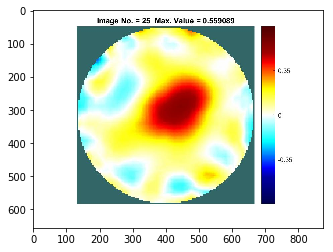

In [2]:
img = cv2.imread('images/image25.jpg')
img_copy = img
plt.imshow(img)
imgray = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.imshow(imgray)
imgray.shape

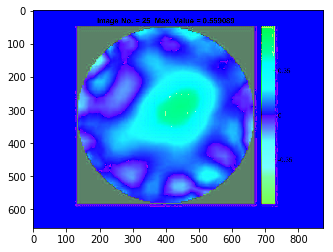

In [3]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)
# grayed = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# plt.imshow(grayed)

In [4]:
# define range of blue color in HSV
lower_red = np.array([110,50,50])
upper_red = np.array([130,255,255])

lower_blue = np.array([10,50,65])
upper_blue = np.array([25,255,255])

lower_yellow = np.array([70,50,65])
upper_yellow = np.array([100,255,255])

# Threshold the HSV image to get only blue colors
mask_red = cv2.inRange(hsv, lower_red, upper_red)
# Threshold the HSV image to get only blue colors
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
# Threshold the HSV image to get only blue colors
mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)

# Bitwise-AND mask and original image
res_red = cv2.bitwise_and(img,img, mask= mask_red)
# Bitwise-AND mask and original image
res_blue = cv2.bitwise_and(img,img, mask= mask_blue)
# Bitwise-AND mask and original image
res_yellow = cv2.bitwise_and(img,img, mask= mask_yellow)

# plt.imshow(img)
# plt.imshow(mask)

# plt.imshow(res)

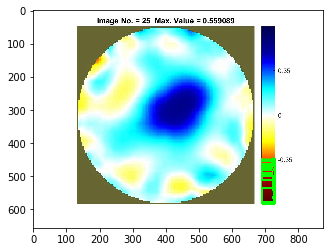

In [9]:

# for i in range(1,3):
## FOR RED
img_copy = cv2.imread('images/image25.jpg')
cimg = res_red
imgray = cimg[:,:,2]
ret,thresh = cv2.threshold(imgray,0,255,0)
#     plt.imshow(thresh)
im2,contours,h = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img_copy, contours, -1, (0,255,0), 3)
plt.imshow(img_copy)
nred = len(contours)

8


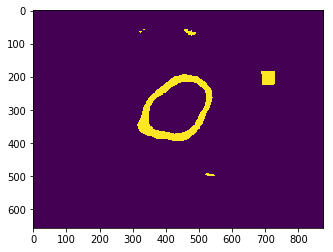

In [23]:
## FOR BLUE
img_copy = cv2.imread('images/image25.jpg')
cimg = res_blue
imgray = cimg[:,:,2]
ret,thresh = cv2.threshold(imgray,0,1,0)
plt.imshow(thresh)
im2,contours,h = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img_copy, contours, -1, (0,255,0), 3)
# plt.imshow(img_copy)
nblue = len(contours)
print(nblue)

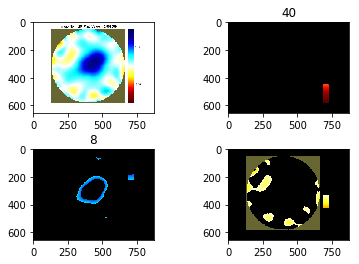

In [12]:
plt.figure()
All_images = [img,res_red,res_blue,res_yellow]
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,5):
    ax = plt.subplot(2,2,i)
    if (i ==2):
        ax.set_title(str(nred))
    if (i ==3):
        ax.set_title(str(nblue))
    plt.imshow(All_images[i-1])